In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
df_test = pd.DataFrame()
path_test = "/eos/uscms/store/user/jennetd/smart-pixels/parquet/shuffled/dataset_3sr_16x16_50x12P5_parquets/test_contained/"

cols = ['x-midplane','y-midplane','cotAlpha','cotBeta']

for f in os.listdir(path_test):
    df_test = pd.concat([df_test,pd.read_parquet(path_test+f,columns=cols)])

print("testing dataset = " + str(len(df_test)))

testing dataset = 108760


In [3]:
df_train = pd.DataFrame()
path_train = "/eos/uscms/store/user/jennetd/smart-pixels/parquet/shuffled/dataset_3sr_16x16_50x12P5_parquets/train_contained/"

cols = ['x-midplane','y-midplane','cotAlpha','cotBeta']

for f in os.listdir(path_train):
    df_train = pd.concat([df_train,pd.read_parquet(path_train+f,columns=cols)])

print("training dataset = " + str(len(df_train)))

training dataset = 434723


In [4]:
tot = len(df_train) + len(df_test)

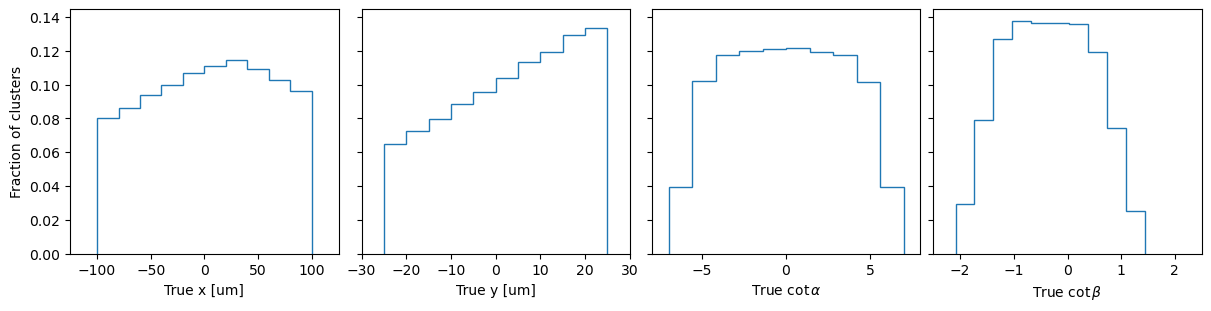

In [6]:
fig, ax = plt.subplots(1,4,figsize=(12,3),sharey=True,constrained_layout=True)

ax[0].hist(df_train['x-midplane'],weights=[1./len(df_train)]*len(df_train),histtype='step')
ax[0].set_ylabel('Fraction of clusters')
ax[0].set_xlabel('True x [um]')
ax[0].set_xlim(-125,125)
ax[1].hist(df_train['y-midplane'],weights=[1./len(df_train)]*len(df_train),histtype='step')
ax[1].set_xlabel('True y [um]')
ax[1].set_xlim(-30,30)
ax[2].hist(df_train['cotAlpha'],weights=[1./len(df_train)]*len(df_train),histtype='step')
ax[2].set_xlabel(r'True $\cot\alpha$')
ax[2].set_xlim(-8,8)
ax[3].hist(df_train['cotBeta'],weights=[1./len(df_train)]*len(df_train),histtype='step')
ax[3].set_xlabel(r'True $\cot\beta$')
ax[3].set_xlim(-2.5,2.5)

#ax[0].hist(df_test['x-midplane']-50./2,weights=[1./len(df_test)]*len(df_test),histtype='step')
#ax[1].hist(df_test['y-midplane']-12.5/2,weights=[1./len(df_test)]*len(df_test),histtype='step')
#ax[2].hist(df_test['cotAlpha'],weights=[1./len(df_test)]*len(df_test),histtype='step')
#ax[3].hist(df_test['cotBeta'],weights=[1./len(df_test)]*len(df_test),histtype='step')

fig.savefig('plots/truth.png',bbox_inches='tight')
fig.savefig('plots/truth.pdf',bbox_inches='tight')
plt.show() 